In [1]:
#cell1
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
DATA_PATH = 'Downloads/ScreenTime vs MentalWellness.csv'

In [7]:
#cell2
df = pd.read_csv(DATA_PATH)
print('Rows, Columns:', df.shape)
print(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/ScreenTime vs MentalWellness.csv'

In [ ]:
#cell3
print(df.columns)


Index(['user_id', 'age', 'gender', 'occupation', 'work_mode',
       'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
       'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
       'productivity_0_100', 'exercise_minutes_per_week',
       'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15'],
      dtype='object')


In [ ]:
#cell 4: high stress indicator
df['high_stress'] = (df['stress_level_0_10'] > 6).astype(int)
print(df['high_stress'])
bins = [0,4,7,10,24]
labels = ['Low','Moderate','High','Very High']
df['screen_time_cat'] = pd.cut(df['screen_time_hours'], bins=bins, labels=labels)

df['lifestyle_score'] = (
    (df['exercise_minutes_per_week'] / df['exercise_minutes_per_week'].max()) * 40 +
    (df['social_hours_per_week'] / df['social_hours_per_week'].max()) * 20 +
    (df['sleep_quality_1_5'] / 5.0) * 40
)



0      1
1      0
2      1
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: high_stress, Length: 400, dtype: int64


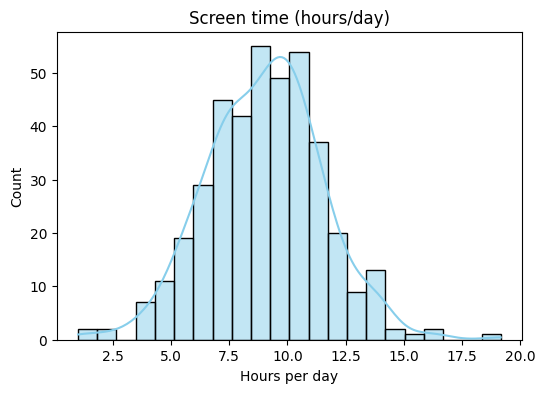

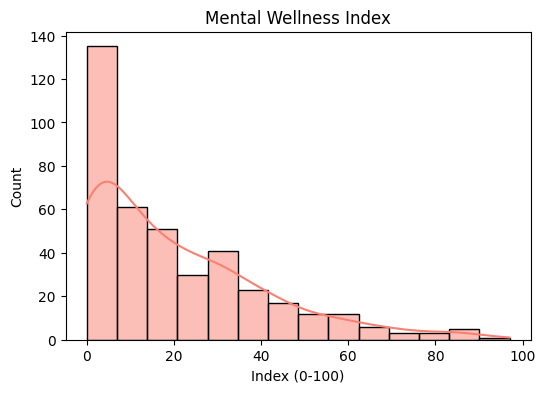

/tmp/ipython-input-2248945881.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='occupation', y='screen_time_hours', data=df, palette='Set2')


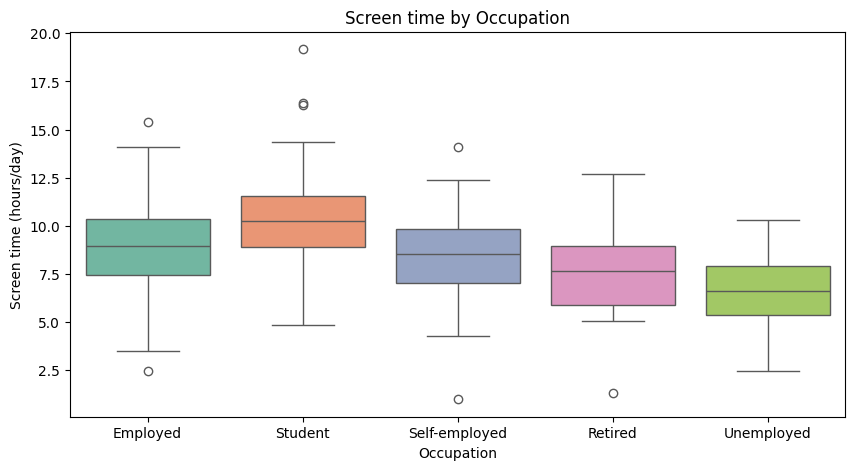

In [ ]:
#cell 5 visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Screen time
plt.figure(figsize=(6,4))
sns.histplot(df['screen_time_hours'], kde=True, color='skyblue')
plt.title('Screen time (hours/day)')
plt.xlabel("Hours per day")
plt.ylabel("Count")
plt.show()

# Histogram: Mental Wellness Index
plt.figure(figsize=(6,4))
sns.histplot(df['mental_wellness_index_0_100'], kde=True, color='salmon')
plt.title('Mental Wellness Index')
plt.xlabel("Index (0-100)")
plt.ylabel("Count")
plt.show()

# Boxplot: Screen time by Occupation
plt.figure(figsize=(10,5))
sns.boxplot(x='occupation', y='screen_time_hours', data=df, palette='Set2')
plt.title('Screen time by Occupation')
plt.xlabel("Occupation")
plt.ylabel("Screen time (hours/day)")
plt.show()


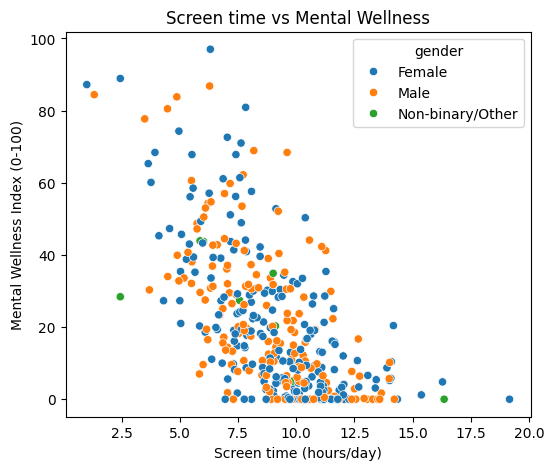

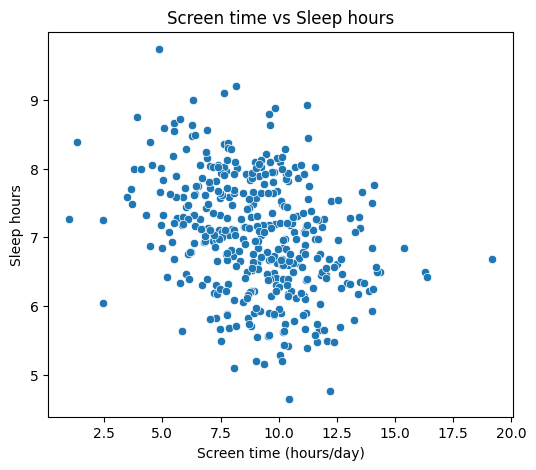

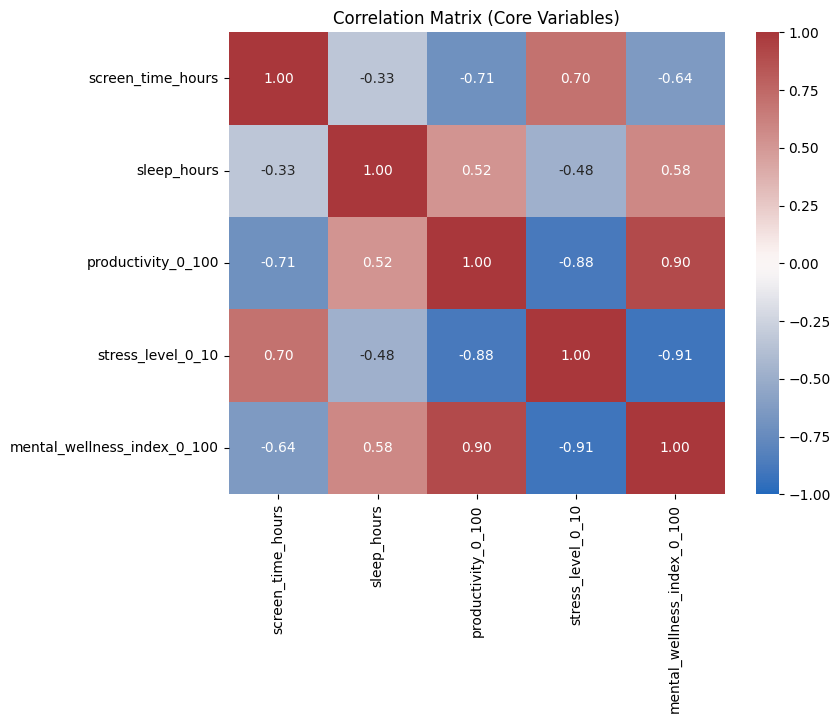

In [ ]:
#cell 6 relationships plots

# Scatterplot: Screen time vs Mental Wellness (by gender)
plt.figure(figsize=(6,5))
sns.scatterplot(x='screen_time_hours',
                y='mental_wellness_index_0_100',
                hue='gender', data=df)
plt.title('Screen time vs Mental Wellness')
plt.xlabel("Screen time (hours/day)")
plt.ylabel("Mental Wellness Index (0-100)")
plt.show()

# Scatterplot: Sleep vs Screen time
plt.figure(figsize=(6,5))
sns.scatterplot(x='screen_time_hours',
                y='sleep_hours', data=df)
plt.title('Screen time vs Sleep hours')
plt.xlabel("Screen time (hours/day)")
plt.ylabel("Sleep hours")
plt.show()

# Correlation heatmap (numeric features only)
corr_cols = [
    'screen_time_hours',
    'sleep_hours',
    'productivity_0_100',
    'stress_level_0_10',
    'mental_wellness_index_0_100'
]

plt.figure(figsize=(8,6))
cm = df[corr_cols].corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Core Variables)')
plt.show()


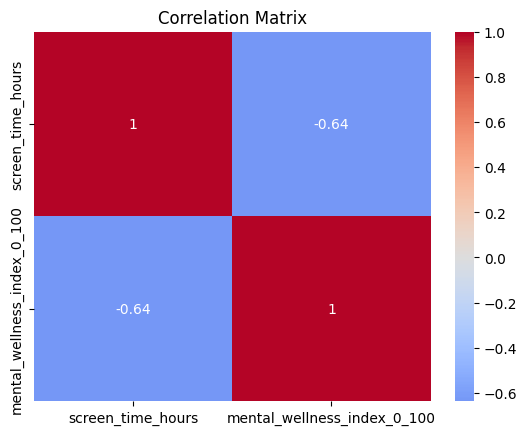

Pearson correlation: PearsonRResult(statistic=np.float64(-0.6359429863421295), pvalue=np.float64(1.021641961200768e-46))
Spearman correlation: SignificanceResult(statistic=np.float64(-0.6490367326934875), pvalue=np.float64(3.3410590120843907e-49))


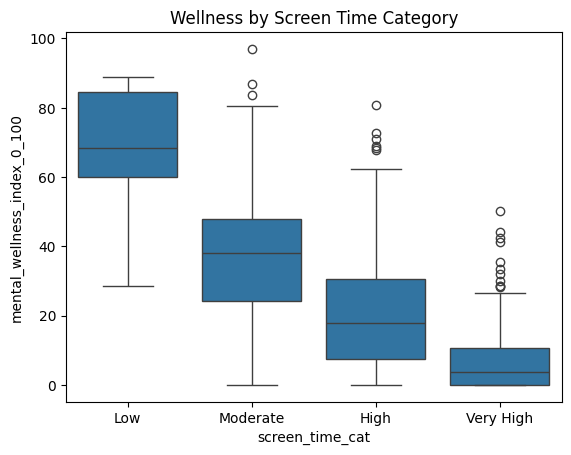

In [ ]:
# cell 7: statistical checks
#correlatioon between screen time and mental wellness

from scipy.stats import pearsonr, spearmanr
# Select numeric columns for correlation
corr = df[['screen_time_hours', 'mental_wellness_index_0_100']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
x = df['screen_time_hours']
y = df['mental_wellness_index_0_100']

plt.title("Correlation Matrix")
plt.show()

#shows linear relationship
pearson_result = pearsonr(x, y)
print("Pearson correlation:", pearson_result)

#shows ranking relationship
spearman_result = spearmanr(x, y)
print("Spearman correlation:", spearman_result)

#boxplot relationship between screen time and wellness
sns.boxplot(x='screen_time_cat', y='mental_wellness_index_0_100', data=df)
plt.title("Wellness by Screen Time Category")
plt.show()

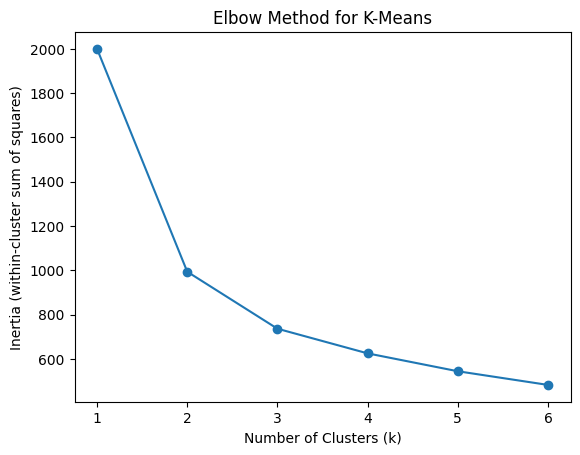

[[-1.10850627  1.04955007 -1.69631552  1.71868752  1.62219156]
 [-0.31355817  0.20373504 -0.06841431  0.07133584  0.1337476 ]
 [ 0.77069114 -0.63878633  0.7778061  -0.79003514 -0.8105046 ]]
         screen_time_hours  sleep_hours  stress_level_0_10  \
cluster                                                      
0                 6.267000     7.906714           4.601429   
1                 8.244785     7.186626           8.007362   
2                10.942335     6.469341           9.777844   

         mental_wellness_index_0_100  productivity_0_100  
cluster                                                   
0                          55.304286           78.641429  
1                          21.778528           56.312883  
2                           4.248503           42.147904  


In [ ]:
#cell 8: clustering/Kmeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_features = [
    'screen_time_hours',
    'sleep_hours',
    'stress_level_0_10',
    'mental_wellness_index_0_100',
    'productivity_0_100'
]

# Step 3: Select those columns from the DataFrame and remove missing values
Xc = df[cluster_features].dropna()

# Step 4: Standardize the data (so all features are on the same scale)
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Step 5: Use the "Elbow Method" to find the best number of clusters
inertia = []               # this will store how well clusters fit
k_values = range(1, 7)     # try cluster counts from 1 to 6

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xc_scaled)
    inertia.append(kmeans.inertia_)  # save the result

# Step 6: Plot the results (Elbow Method)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for K-Means")
plt.show()

# Suppose the elbow suggests k=3
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(Xc_scaled)

# Add cluster labels back to the original DataFrame (aligned by index)
Xc['cluster'] = cluster_labels

# Inspect cluster centers (in scaled space)
print(kmeans_final.cluster_centers_)

# Optional: get descriptive stats per cluster
print(Xc.groupby('cluster').mean())


In [ ]:
#cell 9
from sklearn.impute import SimpleImputer

# Drop unnecessary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(columns=['user_id'], errors='ignore')

# Define the target variable
TARGET = 'mental_wellness_index_0_100'
y = df[TARGET]

# Identify numeric and categorical columns (excluding the target)
num_cols = df.select_dtypes(include=['float64', 'int64', 'bool']).columns.difference([TARGET]).tolist()
cat_cols = df.select_dtypes(include=['category', 'object']).columns.difference([TARGET]).tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['age', 'exercise_minutes_per_week', 'high_stress', 'leisure_screen_hours', 'lifestyle_score', 'productivity_0_100', 'screen_time_hours', 'sleep_hours', 'sleep_quality_1_5', 'social_hours_per_week', 'stress_level_0_10', 'work_screen_hours']
Categorical columns: ['gender', 'occupation', 'screen_time_cat', 'work_mode']


In [ ]:
#cell 10

#  Imputation + Encoding

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Numeric imputation (median)
if df[num_cols].isna().sum().sum() > 0:
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = pd.DataFrame(
        num_imputer.fit_transform(df[num_cols]),
        columns=num_cols,
        index=df.index
    )

# Fill missing categorical values with "Unknown"
for col in cat_cols:
    df[col] = df[col].astype('category')
    if "Unknown" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories("Unknown")
    df[col] = df[col].fillna("Unknown")

# One-Hot Encoding for categorical columns
if cat_cols:
    if sklearn.__version__ >= "1.2":
        encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
    else:
        encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

    encoded_array = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(
        encoded_array,
        columns=encoder.get_feature_names_out(cat_cols),
        index=df.index
    )
else:
    encoded_df = pd.DataFrame(index=df.index)

# Final X feature matrix
X = pd.concat([df[num_cols], encoded_df], axis=1)

print("Preprocessing complete")
print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)
display(pd.concat([X, y], axis=1).head(10))


Preprocessing complete
Feature matrix shape (X): (400, 23)
Target vector shape (y): (400,)


,age,exercise_minutes_per_week,high_stress,leisure_screen_hours,lifestyle_score,productivity_0_100,screen_time_hours,sleep_hours,sleep_quality_1_5,social_hours_per_week,...,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,screen_time_cat_Low,screen_time_cat_Moderate,screen_time_cat_Very High,work_mode_In-person,work_mode_Remote,mental_wellness_index_0_100
0,33,127,1,5.35,22.241688,44.7,10.79,6.63,1,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.3
1,28,74,0,7.03,33.714311,78.0,7.40,8.05,3,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56.2
2,35,67,1,8.69,21.898862,51.8,9.78,6.48,1,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6
3,42,0,1,10.57,12.769874,37.0,11.13,6.89,1,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,28,143,1,9.13,31.828227,38.5,13.22,5.79,1,10.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,28,71,1,9.30,24.253655,44.0,9.83,7.19,1,10.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6,42,141,1,3.20,35.094345,64.8,6.02,7.44,2,4.7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,43.7
7,36,51,0,5.46,37.132407,87.0,6.21,6.78,2,18.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,54.3
8,26,149,0,5.61,56.473388,91.7,6.28,8.48,4,10.1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,86.8
9,34,50,1,8.53,32.003959,42.2,9.37,7.78,2,12.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.7



Linear Regression Metrics:
RMSE: 5.114788043583761
MAE: 3.940521937585255
R2: 0.9338569212869784

Random Forest Metrics:
RMSE: 6.340628194429949
MAE: 4.97525
R2: 0.8983532029599397

Support Vector Regressor Metrics:
RMSE: 13.277012606238603
MAE: 9.887384750696567
R2: 0.5543131109416402

Feature importances (RF):
productivity_0_100           0.656111
stress_level_0_10            0.243299
sleep_quality_1_5            0.029170
lifestyle_score              0.014051
sleep_hours                  0.010011
exercise_minutes_per_week    0.009531
social_hours_per_week        0.007506
screen_time_hours            0.005963
age                          0.005610
work_screen_hours            0.005341
leisure_screen_hours         0.004837
high_stress                  0.002800
gender_Male                  0.001203
occupation_Student           0.001081
occupation_Self-employed     0.000847
work_mode_In-person          0.000729
screen_time_cat_Moderate     0.000613
occupation_Unemployed        0.000385
s

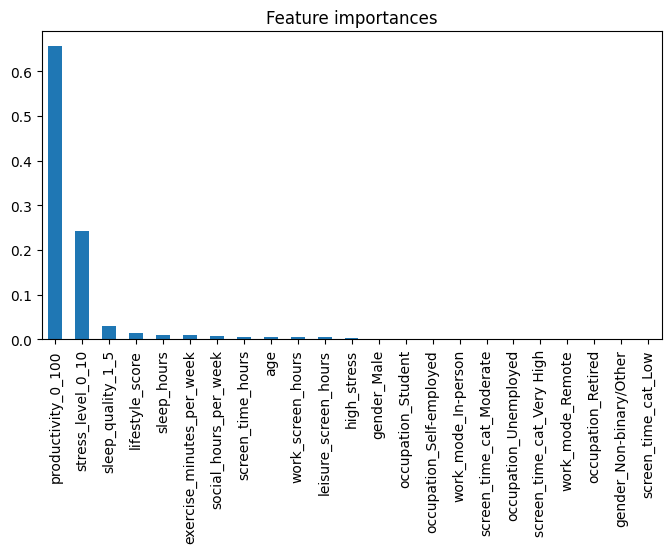

In [ ]:
#cell 11

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Fit on the data and transform
X_scaled = scaler.fit_transform(X)

# (Optional) If you want to keep the column names after scaling:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('\nLinear Regression Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('\nRandom Forest Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

# Model 3: Support Vector Regressor
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('\nSupport Vector Regressor Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('MAE:', mean_absolute_error(y_test, y_pred_svr))
print('R2:', r2_score(y_test, y_pred_svr))

# Feature importances
fi = pd.Series(rf.feature_importances_, index = X_scaled.columns).sort_values(ascending=False)
print('\nFeature importances (RF):')
print(fi)

plt.figure(figsize=(8,4))
fi.plot(kind='bar')
plt.title('Feature importances')
plt.show()


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.97      1.00      0.98        65

    accuracy                           0.97        80
   macro avg       0.99      0.93      0.96        80
weighted avg       0.98      0.97      0.97        80

Accuracy: 0.975
ROC AUC: 0.997948717948718

Classifier Feature importances:
stress_level_0_10            0.396876
productivity_0_100           0.214006
screen_time_hours            0.093643
sleep_hours                  0.066343
sleep_quality_1_5            0.044873
work_screen_hours            0.036252
leisure_screen_hours         0.034980
lifestyle_score              0.031673
screen_time_cat_Moderate     0.017827
exercise_minutes_per_week    0.014510
social_hours_per_week        0.014127
age                          0.010363
screen_time_cat_Very High    0.006299
work_mode_Remote             0.003699
gender_Male                  0.

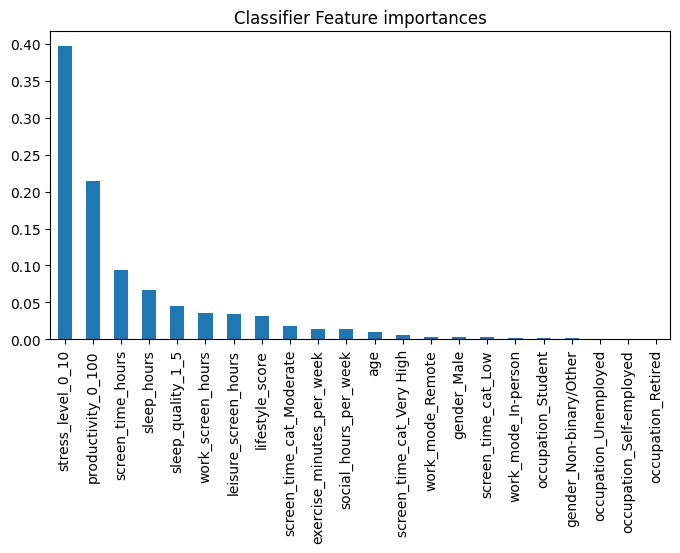

In [ ]:
#cell 12: baselines classification/ predict high-stress

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score


data_df2 = X.drop(['high_stress'], axis = 1)
clf_features = data_df2.columns.tolist()
Xc = data_df2
yc = df['high_stress']
Xtr, Xte, ytr, yte = train_test_split(Xc, yc, test_size=0.2, random_state=42)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(Xtr, ytr)
yp = rfc.predict(Xte)
yp_prob = rfc.predict_proba(Xte)[:,1]

print('\nRandom Forest Classifier Report:')
print(classification_report(yte, yp))
print('Accuracy:', accuracy_score(yte, yp))
try:
    print('ROC AUC:', roc_auc_score(yte, yp_prob))
except Exception:
    pass

# Feature importance for classifier
fi_clf = pd.Series(rfc.feature_importances_, index=clf_features).sort_values(ascending=False)
print('\nClassifier Feature importances:')
print(fi_clf)

plt.figure(figsize=(8,4))
fi_clf.plot(kind='bar')
plt.title('Classifier Feature importances')
plt.show()

In [ ]:
#cell12
from sklearn.model_selection import cross_val_score

def evaluate_with_cv(name, model, X, y, cv=5):

    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    rmse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')

    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    RandomForestRegressor


    print(f"\n{name} CV Results ({cv}-fold):")
    print(f"R²:   {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")
    print(f"RMSE: {rmse_scores.mean():.4f}")
    print(f"MAE:  {mae_scores.mean():.4f}")

evaluate_with_cv("Linear Regression", lr, X, y, cv=5)
evaluate_with_cv("Random Forest", rf, X, y, cv=5)
evaluate_with_cv("SVR Regressor", svr, X, y, cv=5)



Linear Regression CV Results (5-fold):
R²:   0.9232 (± 0.0295)
RMSE: 5.3360
MAE:  4.1945

Random Forest CV Results (5-fold):
R²:   0.8955 (± 0.0211)
RMSE: 6.3729
MAE:  5.0019

SVR Regressor CV Results (5-fold):
R²:   0.2720 (± 0.0638)
RMSE: 17.1380
MAE:  12.7581
